# Approach 2: Neural Networks (Multi-Layer Perceptron)

## Objective: Utilize Predictive Analytics to Improve Customer Engagement by Evaluating Movie Preferences through Customer Likes and Dislikes

### Importing required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Step 1: Data Preprocessing

### 1.1. Loading the Data

In [2]:
# Loading the data

# The full u data set
u_data = pd.read_csv("u.data", sep='\t', names=["user_id", "item_id", "rating", "timestamp"])

# Summary of the u.data dataset    
u_info = pd.read_csv('u.info', header=None, names=['Summary'])

# Information about the items (movies)
u_item = pd.read_csv("u.item", sep='|', encoding="latin-1", names=["movie_id", "movie_title", "release_date", "video_release_date", "IMDb_URL", "unknown", "Action", "Adventure", "Animation", "Children's", "Comedy", "Crime", "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror", "Musical", "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western"])

# List of movie genres
u_genre = pd.read_csv('u.genre', sep='|', header=None, names=['Genre', 'Code'])

# Demographic information about the users
u_user = pd.read_csv("u.user", sep='|', names=["user_id", "age", "gender", "occupation", "zip_code"])

# List of user occupations
u_occupation = pd.read_csv('u.occupation', header=None, names=['Occupations'])

ua_train = pd.read_csv("ua.train", sep='\t', names=["user_id", "item_id", "rating", "timestamp"])
ua_test = pd.read_csv("ua.test", sep='\t', names=["user_id", "item_id", "rating", "timestamp"])


#### Checking the structure of u_data

In [3]:
u_data.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


#### Checking the structure of u_info

In [4]:
u_info.head()

,Summary
0,943 users
1,1682 items
2,100000 ratings


#### Checking the structure of u_item

In [5]:
u_item.head()

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


#### Checking the structure of u_genre

In [6]:
u_genre

,Genre,Code
0,unknown,0
1,Action,1
2,Adventure,2
3,Animation,3
4,Children's,4
5,Comedy,5
6,Crime,6
7,Documentary,7
8,Drama,8
9,Fantasy,9


#### Checking the structure of u_user

In [7]:
u_user.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


#### Checking the structure of u_occupation

In [8]:
u_occupation

,Occupations
0,administrator
1,artist
2,doctor
3,educator
4,engineer
5,entertainment
6,executive
7,healthcare
8,homemaker
9,lawyer


#### Checking the structure of ua_train

In [9]:
ua_train.head()

,user_id,item_id,rating,timestamp
0,1,1,5,874965758
1,1,2,3,876893171
2,1,3,4,878542960
3,1,4,3,876893119
4,1,5,3,889751712


#### Checking the structure of ua_test

In [10]:
ua_test.head()

,user_id,item_id,rating,timestamp
0,1,20,4,887431883
1,1,33,4,878542699
2,1,61,4,878542420
3,1,117,3,874965739
4,1,155,2,878542201


### 1.2. Data Cleaning

#### Checking u_data for data cleaning

In [11]:
# Checking if u_data contains 'NaN' values
u_data.isna().sum()

user_id      0
item_id      0
rating       0
timestamp    0
dtype: int64

#### Checking u_item for data cleaning

In [12]:
# Checking if u_item contains 'NaN' values
u_item.isna().sum()

movie_id                 0
movie_title              0
release_date             1
video_release_date    1682
IMDb_URL                 3
unknown                  0
Action                   0
Adventure                0
Animation                0
Children's               0
Comedy                   0
Crime                    0
Documentary              0
Drama                    0
Fantasy                  0
Film-Noir                0
Horror                   0
Musical                  0
Mystery                  0
Romance                  0
Sci-Fi                   0
Thriller                 0
War                      0
Western                  0
dtype: int64

In [13]:
# Dropping the 'video_release_date' column from u_item as the column only contains 'NaN' values
u_item = u_item.drop(columns='video_release_date')

In [14]:
# Dropping rows containing 'NaN' values in u_item
u_item.dropna(inplace=True)

In [15]:
# Checking if u_item contains 'NaN' values again
u_item.isna().sum()

movie_id        0
movie_title     0
release_date    0
IMDb_URL        0
unknown         0
Action          0
Adventure       0
Animation       0
Children's      0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film-Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-Fi          0
Thriller        0
War             0
Western         0
dtype: int64

#### Checking u_user for data cleaning

In [16]:
# Checking if u_user contains 'NaN' values
u_user.isna().sum()

user_id       0
age           0
gender        0
occupation    0
zip_code      0
dtype: int64

#### Checking ua_train for data cleaning

In [17]:
# Checking if ua_train contains 'NaN' values
ua_train.isna().sum()

user_id      0
item_id      0
rating       0
timestamp    0
dtype: int64

#### Checking ua_test for data cleaning

In [18]:
# Checking if ua_test contains 'NaN' values
ua_test.isna().sum()

user_id      0
item_id      0
rating       0
timestamp    0
dtype: int64

### 1.3. Feature Engineering and Data Exploration

#### Merging ua_train and ua_test with u_item and u_user

In [19]:
ua_train = ua_train.merge(u_item, left_on='item_id', right_on='movie_id').merge(u_user, on='user_id')
ua_test = ua_test.merge(u_item, left_on='item_id', right_on='movie_id').merge(u_user, on='user_id')

In [20]:
# Checking ua_train after merging
ua_train.head()

,user_id,item_id,rating,timestamp,movie_id,movie_title,release_date,IMDb_URL,unknown,Action,...,Mystery,Romance,Sci-Fi,Thriller,War,Western,age,gender,occupation,zip_code
0,1,1,5,874965758,1,Toy Story (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,...,0,0,0,0,0,0,24,M,technician,85711
1,1,2,3,876893171,2,GoldenEye (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,...,0,0,0,1,0,0,24,M,technician,85711
2,1,3,4,878542960,3,Four Rooms (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,...,0,0,0,1,0,0,24,M,technician,85711
3,1,4,3,876893119,4,Get Shorty (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,...,0,0,0,0,0,0,24,M,technician,85711
4,1,5,3,889751712,5,Copycat (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,...,0,0,0,1,0,0,24,M,technician,85711


In [21]:
# Checking if ua_train contains 'NaN' values
ua_train.isna().sum()

user_id         0
item_id         0
rating          0
timestamp       0
movie_id        0
movie_title     0
release_date    0
IMDb_URL        0
unknown         0
Action          0
Adventure       0
Animation       0
Children's      0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film-Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-Fi          0
Thriller        0
War             0
Western         0
age             0
gender          0
occupation      0
zip_code        0
dtype: int64

In [22]:
# Checking ua_test after merging
ua_test.head()

,user_id,item_id,rating,timestamp,movie_id,movie_title,release_date,IMDb_URL,unknown,Action,...,Mystery,Romance,Sci-Fi,Thriller,War,Western,age,gender,occupation,zip_code
0,1,20,4,887431883,20,Angels and Insects (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Angels%20and%...,0,0,...,0,1,0,0,0,0,24,M,technician,85711
1,1,33,4,878542699,33,Desperado (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Desperado%20(...,0,1,...,0,1,0,1,0,0,24,M,technician,85711
2,1,61,4,878542420,61,Three Colors: White (1994),01-Jan-1994,http://us.imdb.com/M/title-exact?Trzy%20kolory...,0,0,...,0,0,0,0,0,0,24,M,technician,85711
3,1,117,3,874965739,117,"Rock, The (1996)",07-Jun-1996,"http://us.imdb.com/M/title-exact?Rock,%20The%2...",0,1,...,0,0,0,1,0,0,24,M,technician,85711
4,1,155,2,878542201,155,Dirty Dancing (1987),01-Jan-1987,http://us.imdb.com/M/title-exact?Dirty%20Danci...,0,0,...,0,1,0,0,0,0,24,M,technician,85711


In [23]:
# Checking if ua_test contains 'NaN' values
ua_test.isna().sum()

user_id         0
item_id         0
rating          0
timestamp       0
movie_id        0
movie_title     0
release_date    0
IMDb_URL        0
unknown         0
Action          0
Adventure       0
Animation       0
Children's      0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film-Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-Fi          0
Thriller        0
War             0
Western         0
age             0
gender          0
occupation      0
zip_code        0
dtype: int64

#### Filtering ratings

Filtering ua_train to keep only movies with more than ten ratings

In [24]:
# Count the number of ratings for each movie
movie_ratings_count = ua_train['movie_id'].value_counts()

# Find the movie IDs with more than ten rating
movies_with_multiple_ratings = movie_ratings_count[movie_ratings_count > 10].index

# Filter the DataFrame to keep only movies with more than ten rating
ua_train = ua_train[ua_train['movie_id'].isin(movies_with_multiple_ratings)]


Filtering ua_test to keep only movies with more than ten ratings

In [25]:
# Count the number of ratings for each movie
movie_ratings_count = ua_test['movie_id'].value_counts()

# Find the movie IDs with more than ten rating
movies_with_multiple_ratings = movie_ratings_count[movie_ratings_count > 10].index

# Filter the DataFrame to keep only movies with more than ten rating
ua_test = ua_test[ua_test['movie_id'].isin(movies_with_multiple_ratings)]


#### Converting the "release_date" column into a datetime format and extracting the year component to generate a new column

In [26]:
# Convert release_date to datetime
ua_train['release_date'] = pd.to_datetime(ua_train['release_date'], format='%d-%b-%Y')

# Extract the year and create a new 'release_year' column
ua_train['release_year'] = ua_train['release_date'].dt.year

# Dropping the original 'release_date' column
ua_train.drop('release_date', axis=1, inplace=True)

In [27]:
# Convert release_date to datetime
ua_test['release_date'] = pd.to_datetime(ua_test['release_date'], format='%d-%b-%Y')

# Extract the year and create a new 'release_year' column
ua_test['release_year'] = ua_test['release_date'].dt.year

# Dropping the original 'release_date' column
ua_test.drop('release_date', axis=1, inplace=True)

#### Categorizing release year

Checking earliest and latest release year for ua_train 

In [28]:
min_year = ua_train['release_year'].min()
max_year = ua_train['release_year'].max()

print("Earliest year:", min_year)
print("Latest year:", max_year)

Earliest year: 1922
Latest year: 1998


Checking earliest and latest release year for ua_test

In [29]:
min_year = ua_test['release_year'].min()
max_year = ua_test['release_year'].max()

print("Earliest year:", min_year)
print("Latest year:", max_year)

Earliest year: 1934
Latest year: 1998


Categorizing release year for ua_train and ua_test

In [30]:
# Define a custom function to categorize release years 
def categorize_year(year):
        if year < 1940:
            return "before 1940"
        elif year < 1950:
            return "1940-1949"
        elif year < 1960:
            return "1950-1959"
        elif year < 1970:
            return "1960-1969"
        elif year < 1980:
            return "1970-1979"
        elif year < 1990:
            return "1980-1989"
        elif year < 2000:
            return "1990-1999"
        else:
            return "2000 and later"
        
# Apply the custom function 
ua_train['release_year'] = ua_train['release_year'].apply(categorize_year)


# Apply the custom function 
ua_test['release_year'] = ua_test['release_year'].apply(categorize_year)

#### Categorizing age

Checking minimum and maximum age for ua_train 

In [31]:
min_age = ua_train['age'].min()
max_age = ua_train['age'].max()

print("Minimum age:", min_age)
print("Maximum age:", max_age)

Minimum age: 7
Maximum age: 73


Checking minimum and maximum age for ua_test 

In [32]:
min_age = ua_test['age'].min()
max_age = ua_test['age'].max()

print("Minimum age:", min_age)
print("Maximum age:", max_age)

Minimum age: 7
Maximum age: 73


Categorizing age groups for ua_train and ua_test

In [33]:
# Define a custom function to categorize age into age groups
def categorize_age(age):
    if age < 20:
        return "below 20"
    elif 20 <= age <= 30:
        return "21-30"
    elif 31 <= age <= 40:
        return "31-40"
    elif 41 <= age <= 50:
        return "41-50"
    elif 51 <= age <= 60:
        return "51-60"
    else:
        return "above 60"

# Apply the custom function 
ua_train['age'] = ua_train['age'].apply(categorize_age)


# Apply the custom function 
ua_test['age'] = ua_test['age'].apply(categorize_age)

#### Selecting relevant features for the construction of a Neural Network Multi-Layer Perceptron Model

In [34]:
# Extract relevant features
features = ['unknown', 'Action', 'Adventure', 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
            'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western',
            'release_year', 'age', 'gender', 'occupation', 'rating']

In [35]:
# Modifying ua_train and ua_test to only include the relevant features
ua_train = ua_train[features]
ua_test = ua_test[features]

#### Encoding age

Count plot for age for ua_train

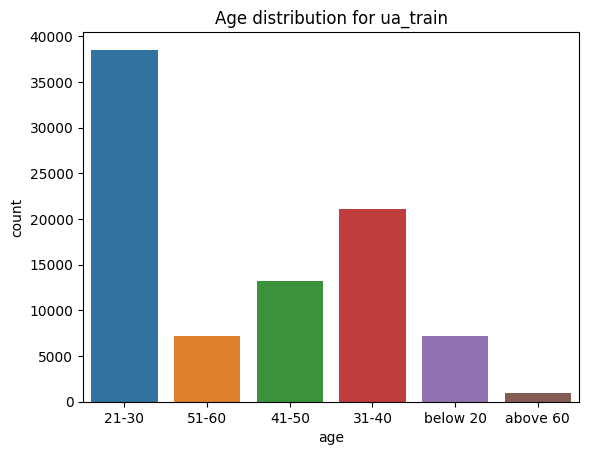

In [36]:
sns.countplot(data=ua_train, x='age')
plt.title('Age distribution for ua_train')
plt.show()

Encoding age groups for ua_train

In [37]:
# Encode 'age' in ua_train
ua_train = pd.get_dummies(ua_train, columns=['age'], prefix='age')

Count plot for age for ua_test

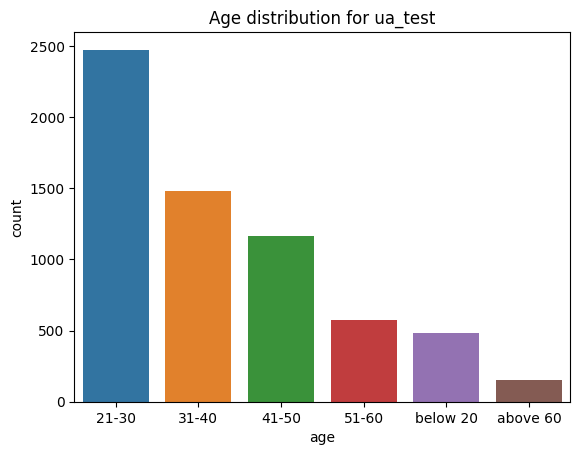

In [38]:
sns.countplot(data=ua_test, x='age')
plt.title('Age distribution for ua_test')
plt.show()

Encoding age groups for ua_test

In [39]:
# Encode 'age' in ua_test
ua_test = pd.get_dummies(ua_test, columns=['age'], prefix='age')

#### Encoding gender

Count plot for gender for ua_train

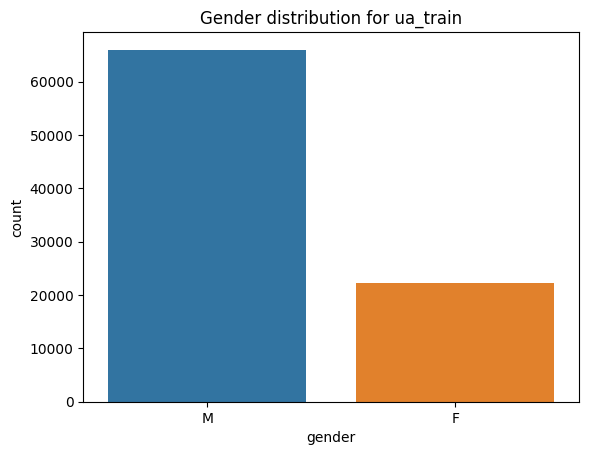

In [40]:
sns.countplot(data=ua_train, x='gender')
plt.title('Gender distribution for ua_train')
plt.show()

Encoding the gender column for ua_train

In [41]:
# Encode 'gender' in ua_train
ua_train = pd.get_dummies(ua_train, columns=['gender'], prefix=['gender'], drop_first=True)

Count plot for gender for ua_test

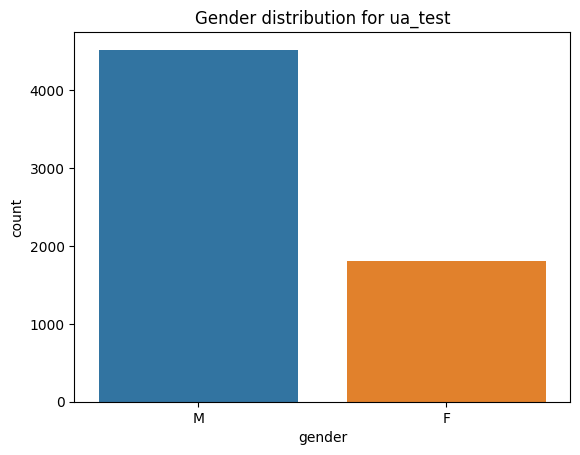

In [42]:
sns.countplot(data=ua_test, x='gender')
plt.title('Gender distribution for ua_test')
plt.show()

Encoding the gender column for ua_test

In [43]:
# Encode 'gender' in ua_test
ua_test = pd.get_dummies(ua_test, columns=['gender'], prefix=['gender'], drop_first=True)

#### Encoding occupation 

Count plot for occupation for ua_train

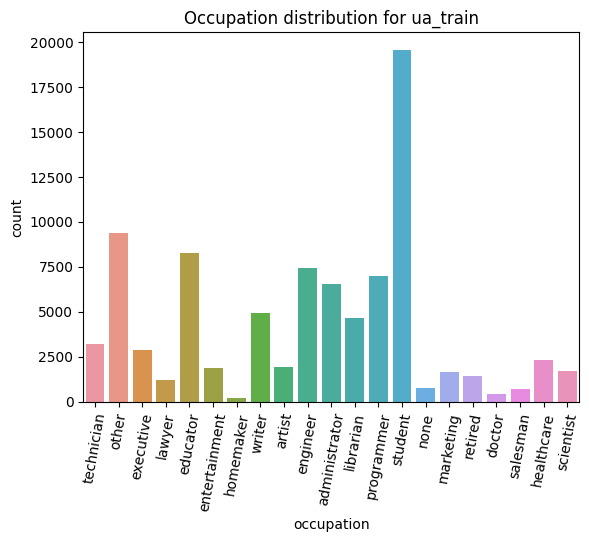

In [44]:
sns.countplot(data=ua_train, x='occupation')
plt.title('Occupation distribution for ua_train')
plt.xticks(rotation=80)
plt.show()

Encoding the occupation column for ua_train

In [45]:
# Encode 'occupation' in ua_train
ua_train = pd.get_dummies(ua_train, columns=['occupation'], prefix='occupation')

Count plot for occupation for ua_test

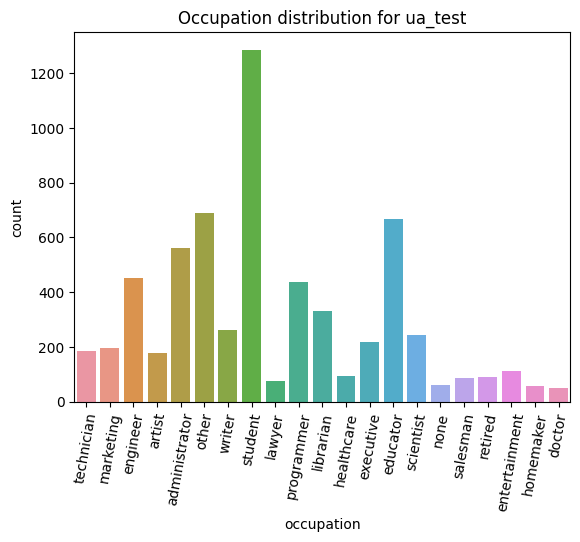

In [46]:
sns.countplot(data=ua_test, x='occupation')
plt.title('Occupation distribution for ua_test')
plt.xticks(rotation=80)
plt.show()

Encoding the occupation column for ua_test

In [47]:
# Encode 'occupation' in ua_test
ua_test = pd.get_dummies(ua_test, columns=['occupation'], prefix='occupation')

#### Encoding Release Year 

Count plot for release year for ua_train

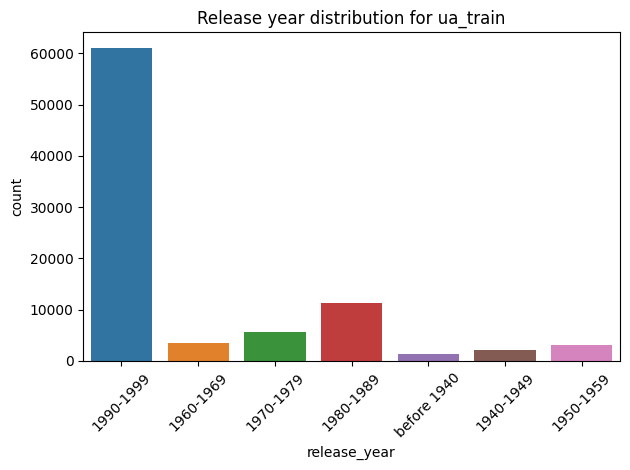

In [48]:
sns.countplot(data=ua_train, x='release_year')
plt.title('Release year distribution for ua_train')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [49]:
# Encode 'release_year' in ua_train
ua_train = pd.get_dummies(ua_train, columns=['release_year'], prefix='release_year')

Count plot for release year for ua_test

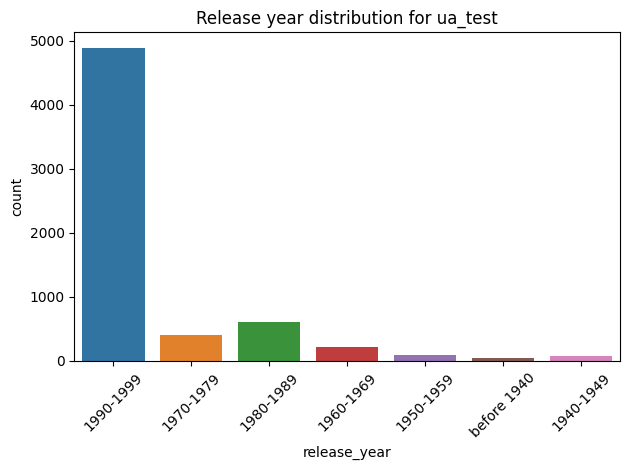

In [50]:
sns.countplot(data=ua_test, x='release_year')
plt.title('Release year distribution for ua_test')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [51]:
# Encode 'release_year' in ua_test
ua_test = pd.get_dummies(ua_test, columns=['release_year'], prefix='release_year')

#### Verifying the ultimate shape of ua_train before inputting it into the Neural Network Multi-Layer Perceptron Model

In [52]:
ua_train.shape

(88158, 55)

#### Verifying the ultimate shape of ua_test before inputting it into the Neural Network Multi-Layer Perceptron Model

In [53]:
ua_test.shape

(6333, 55)

#### Saving the ua_train dataframe to a CSV file

In [54]:
ua_train.to_csv("ua_train.csv",encoding='iso-8859-1',index=False,na_rep='NULL')

#### Saving the ua_test dataframe to a CSV file

In [55]:
ua_test.to_csv("ua_test.csv",encoding='iso-8859-1',index=False,na_rep='NULL')